In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FOLDERPATH = '../'

In [3]:
## LOAD DATA
test_data_path = FOLDERPATH+'old-data/test.csv'
train_data_path = FOLDERPATH+'old-data/v3.2.2_train.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
y_train,y_test = train_data[['TOT_fast','TOT_med_fast','TOT_med','TOT_med_slow','TOT_slow']], test_data[['TOT_fast','TOT_med_fast','TOT_med','TOT_med_slow','TOT_slow']]
X_train,X_test = train_data.drop(['Unnamed: 0','TOT_fast','TOT_med_fast','TOT_med','TOT_med_slow','TOT_slow'],axis=1),test_data.drop(['Unnamed: 0','TOT_fast','TOT_med_fast','TOT_med','TOT_med_slow','TOT_slow'],axis=1)

In [4]:
np.random.seed(6)
idx = np.random.choice(X_train.shape[0],1000)
X_train_rand,y_train_rand = X_test.iloc[:3000],y_test.iloc[:3000]

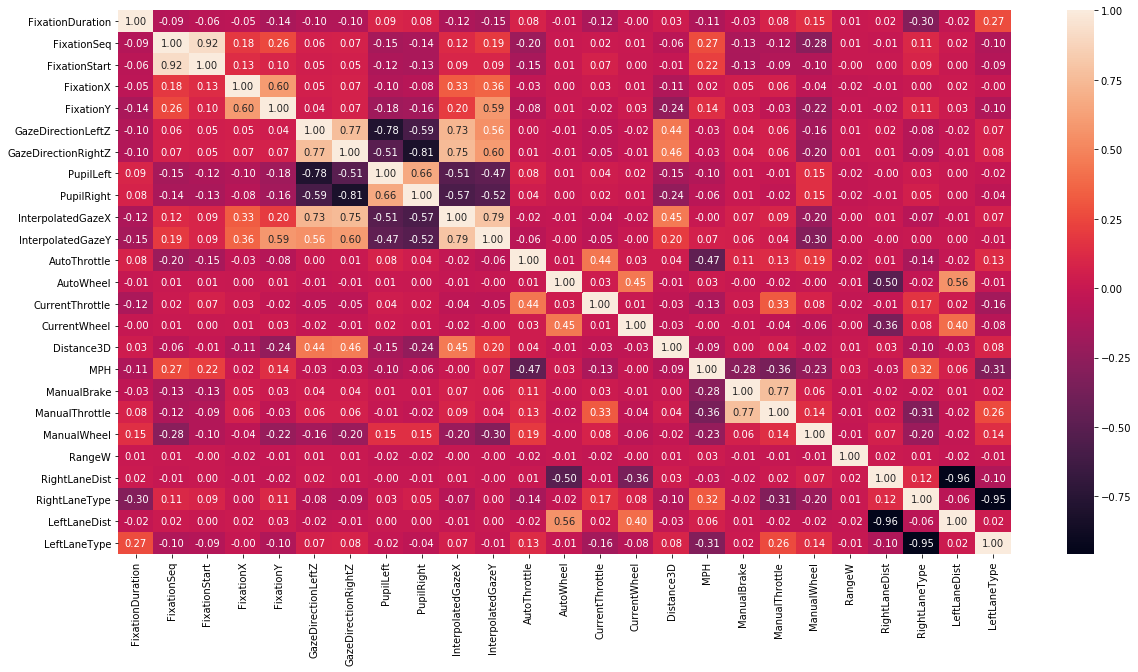

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,fmt='.2f')

In [6]:
dataViz = pd.concat([X_train,pd.DataFrame(np.where(y_train.values[:,-5:] == 1)[1])],axis=1)

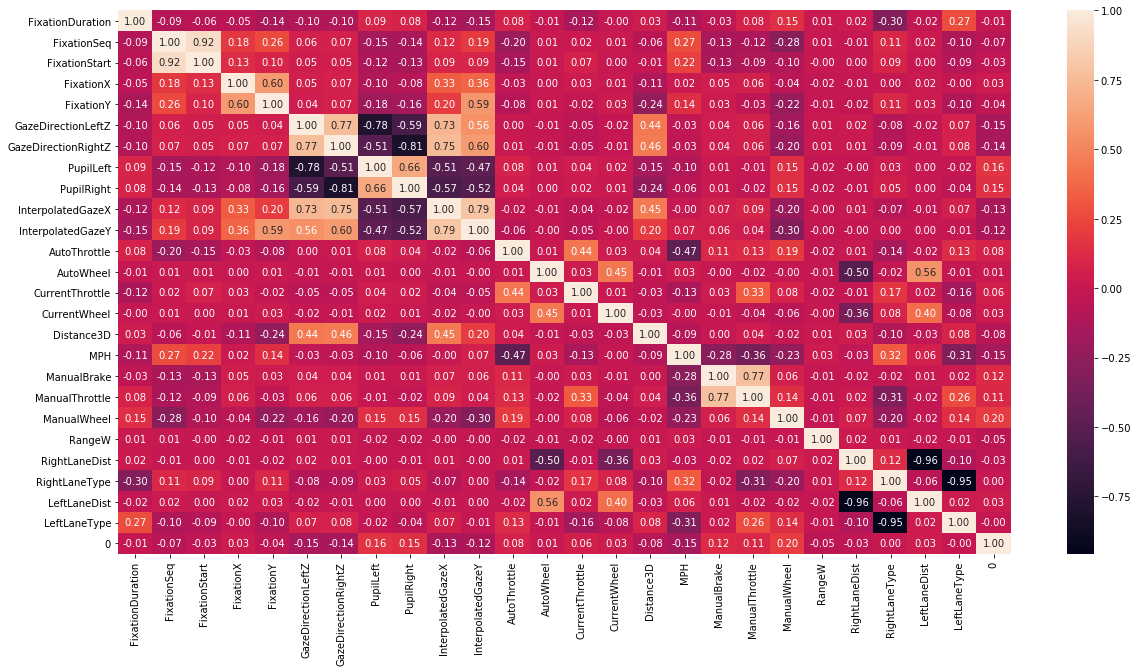

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(dataViz.corr(),annot=True,fmt='.2f')

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [6]:
pca = PCA(n_components=3)
x_trans = pca.fit_transform(X_test)
labels = y_test.values.argmax(axis=1)
data = pd.DataFrame({'dim1':x_trans[:,0],'dim2':x_trans[:,1],'labels':labels})

In [ ]:
tsne = TSNE(n_components=3)
x_trans = tsne.fit_transform(X_test)
labels = y_test.values.argmax(axis=1)
data = pd.DataFrame({'dim1':x_trans[:,0],'dim2':x_trans[:,1],'labels':labels})

<IPython.core.display.Javascript object>


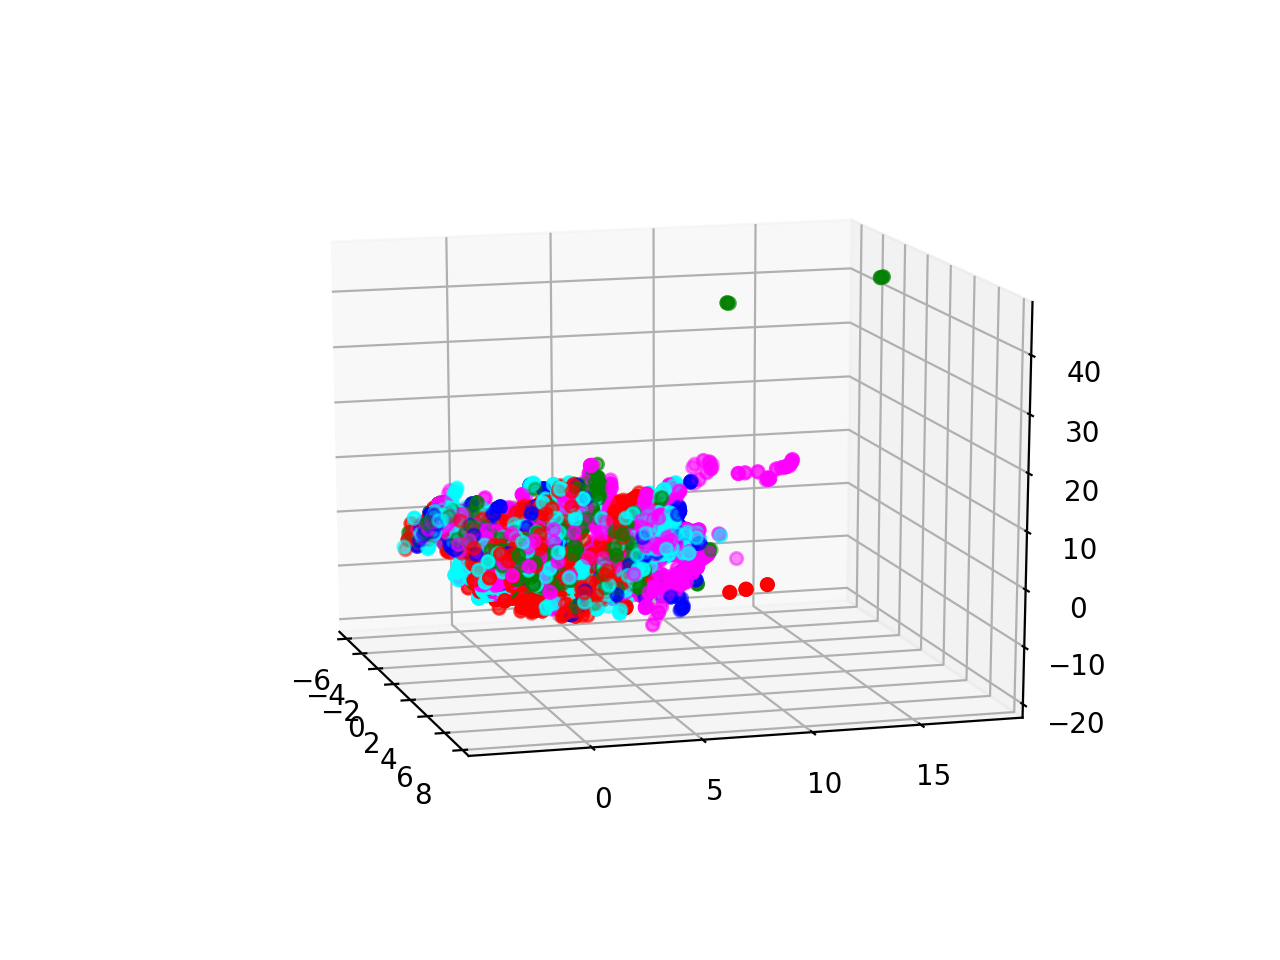

In [7]:
colors = {0:'red', 1:'blue', 2:'green', 3:'magenta', 4:'cyan'}
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_trans[:,0],x_trans[:,1],x_trans[:,2],c=data['labels'].apply(lambda x: colors[x]))

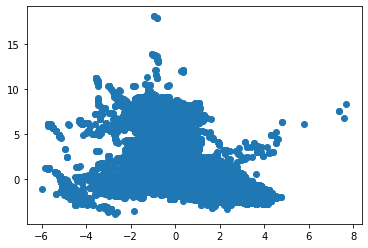

In [25]:
colors = ['b','r','m','y','c']
plt.scatter(x_trans[:,0],x_trans[:,1])

In [41]:
labels = y_test.values.argmax(axis=1)

In [42]:
data = pd.DataFrame({'dim1':x_trans[:,0],'dim2':x_trans[:,1],'labels':labels})

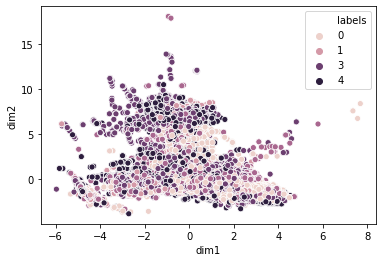

In [44]:
sns.scatterplot(data['dim1'],data['dim2'],hue=data['labels'])